In [1]:
import os

if not {"word2vec.model", "words.txt"}.issubset(set(os.listdir())):

    print("Beginning download")

    import gensim.downloader

    print("imported")

    wv = gensim.downloader.load("word2vec-google-news-300")

    print("loaded")

    wv.save("./word2vec.model")

    print("saved")
    
    f = open("words.txt", "x")
    for index, word in enumerate(wv.index_to_key):
        if index == 300:
            break
        f.write(word)
        f.write("\n")
    f.close()

    print("Download complete.")

print("File Exists")

from gensim.models import KeyedVectors
wv = KeyedVectors.load("word2vec.model", mmap="r")
print(wv)

Beginning download
imported
loaded
saved
Download complete.
File Exists
KeyedVectors<vector_size=300, 3000000 keys>


In [2]:
import numpy as np

x = []
for i in range(300):
    x.append(wv[i])
    # if (i == 100000):
    #     print("hi")
    # if (i == 1000000):
    #     print("hi")
x = np.asarray(x)

# x = np.array([])
# for i in range(300):
#     x = np.append(x, wv[i])
#     print(x[i][0], end = " ")
# print(x.shape)


In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [4]:
#need a way better way to do this T-T
maxTransform = np.asarray([
    [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [],  
    [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], 
    [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], 
    [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], 
    [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], 
    [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], 
    [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], 
    [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], 
    [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], 
    [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], 
    ])
maxNum = 0

def dataAnalysis(dim, data):
    global maxTransform, maxNum
    if maxNum > dim:
        maxTransform2 = np.transpose(maxTransform)
        maxTransform2 = maxTransform2[:dim]
        maxTransform2 = np.transpose(maxTransform2)
        return maxTransform2

    else:
        newDim = dim - maxNum

        arr2 = data[ : , newDim : data[0].__len__() ]
        pca = PCA(n_components = newDim)
        pca.fit(arr2)
        arr2 = np.asarray(pca.transform(arr2))

        np.transpose(maxTransform)
        np.transpose(arr2)
        maxTransform = np.append(maxTransform, arr2, 1)
        np.transpose(maxTransform)

        # print(type(maxTransform))
        # print(type(arr2))
        # print("Max Transform # of vectors " + str(maxTransform.__len__()))
        # print("Max Transform Size of vectors " + str(maxTransform[0].__len__()))

        maxNum = dim
        return maxTransform

#x = np.array([[1, 2, 3, 4, 5], [2, 1, 3, 3, 1], [2, 4, 1, 2, 3], [4, 3, 2, 1, 4]])
# print(dataAnalysis(2, x))
# dataAnalysis(3, x)
# print(dataAnalysis(2, x))
# print(maxTransform)

#perhaps describe how to do it with gradient function and the like to pick a random dimension
#instead of going down one dimension at a time


In [5]:
def visualize(dim, data):
    #data = np.array(data)
    if dim == 3 or dim == 2:
        fig = plt.figure()
        plt.clf()

        if dim == 3:
            ax = fig.add_subplot(projection = "3d") #this is rectilinear, 3d, etc. projection= "3d"
        elif dim == 2:
            ax = fig.add_subplot(projection = "rectilinear")
        
        ax.set_position([0, 0, 0.95, 1])
        plt.cla()

        if dim == 3:
            ax.scatter(data[:, 0], data[:, 1], data[:, 2])
        elif dim == 2:
            ax.scatter(data[:, 0], data[:, 1])

        
        plt.show()
    else:
        print("Too many/too few dimensions to visualize")
        ans = "n"
        #ans = input("Proceed with 2-D? y/n")
        if ans == "y":
            fig = plt.figure(figsize=(5 * dim, 5 * dim))
            fig.subplots_adjust(hspace=0.4, wspace=0.4)
            for i in range(dim):
                for j in range(i+1, dim):
                    ax2 = fig.add_subplot(dim, dim-1, (i+1)*(j+1))
                    ax2.scatter(data[:, i], data[:, j])
            plt.show()

        #https://matplotlib.org/stable/api/projections_api.html#module-matplotlib.projections

In [6]:
def playable(dim, data):
    y = dataAnalysis(dim, data)
    print("size" + str(y[0].__len__()))
    print("length" + str(y.__len__()))
    #figure out AI later
    #maybe instead of coding ai, all I have to do is check number of words with similarity value 
    #biggest similarity
    #smallest similarity
    #level of variance?
    #number of words with distance d away from starting word
    #want to preserve distance, too
    if dim >= 2: 
        return True
    else:
        return False

In [7]:
def findDim(data, start=1, end=300):
    print(start)
    print(end)
    if start >= end:
        return end
    else:
        mid = (start + end)//2
        if not playable(mid, data):
            return findDim(data, mid, end)
        else:
            return findDim(data, start, mid)

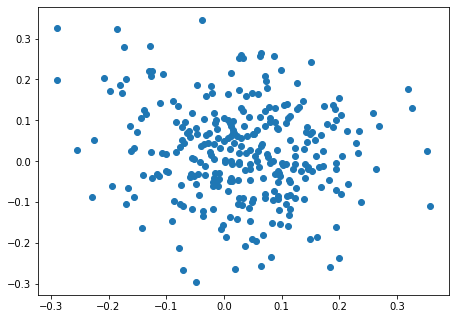

In [ ]:
visualize(2, x)

In [9]:
m = findDim(x)
visualize(m, x)

: 

: 